   ray1      ray2      ray3      ray4      ray5     kartx     karty     kartz  \
0  -1.0  6.520910  4.611073  6.489857  4.588929  15.98893  0.275700  3.105008   
1  -1.0  6.520907  4.611071  6.489859  4.588931  15.98893  0.275717  3.105008   
2  -1.0  6.520906  4.611070  6.489861  4.588932  15.98893  0.275722  3.105007   
3  -1.0  6.520902  4.611067  6.489865  4.588934  15.98894  0.275743  3.105007   
4  -1.0  6.520895  4.611062  6.489872  4.588939  15.98894  0.275746  3.105007   

       time      action  
0  0.419318  ACCELERATE  
1  0.437750  ACCELERATE  
2  0.445260  ACCELERATE  
3  0.506243  ACCELERATE  
4  0.600826  ACCELERATE  








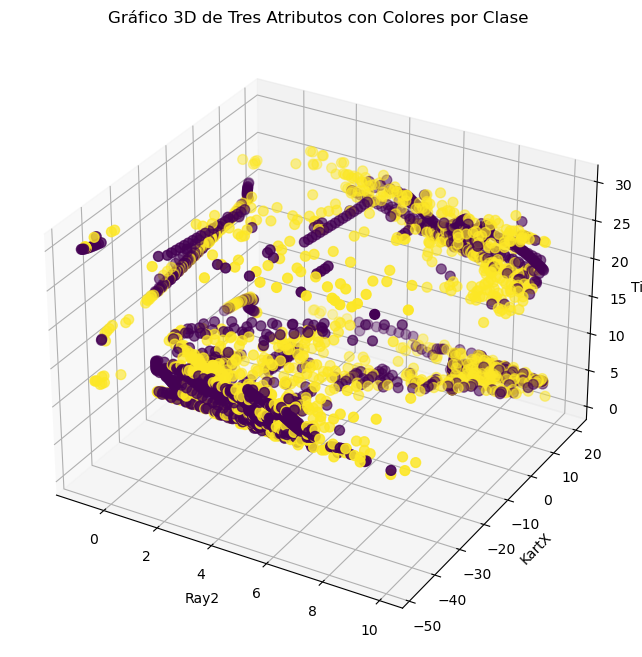

c:\Users\danie\anaconda3\Lib\site-packages\plotly\express\_core.py:279: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  dims = [


DataFrame después de manejar valores nulos y normalizar:
   ray1      ray2      ray3      ray4      ray5     kartx     karty     kartz  \
0   0.0  0.683928  0.540215  6.489857  4.588929  0.942452  0.000289  0.447866   
1   0.0  0.683928  0.540215  6.489859  4.588931  0.942452  0.000346  0.447866   
2   0.0  0.683928  0.540215  6.489861  4.588932  0.942452  0.000362  0.447866   
3   0.0  0.683927  0.540215  6.489865  4.588934  0.942452  0.000433  0.447866   
4   0.0  0.683927  0.540214  6.489872  4.588939  0.942452  0.000444  0.447866   

       time      action  
0  0.001552  ACCELERATE  
1  0.002174  ACCELERATE  
2  0.002427  ACCELERATE  
3  0.004486  ACCELERATE  
4  0.007678  ACCELERATE  


c:\Users\danie\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

C:\Users\danie\AppData\Local\Temp\ipykernel_21196\3101577419.py:93: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




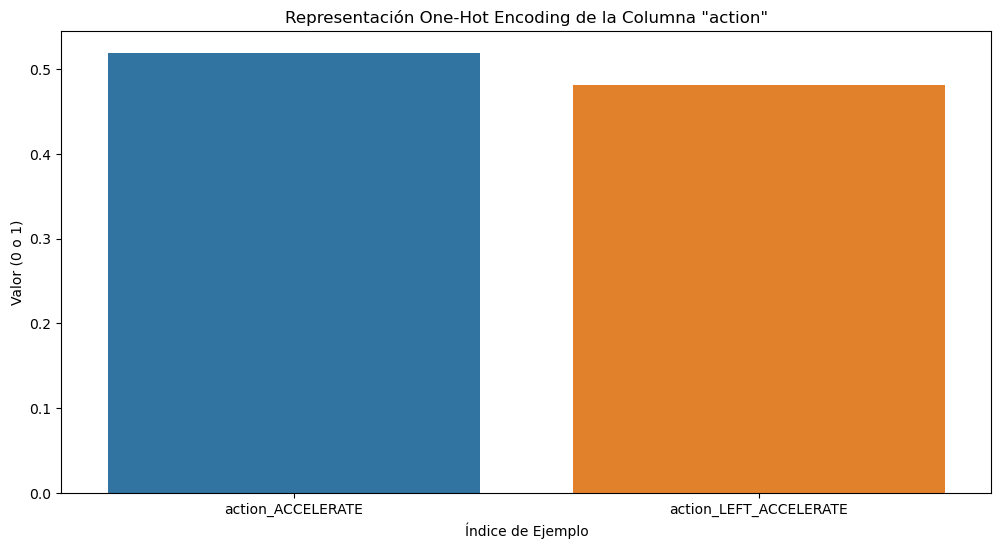

c:\Users\danie\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Costo de la red neuronal en entrenamiento: 1.24%
Precisión de entrenamiento: 58.24%
Precisión en el conjunto de prueba: 59.36%
Precisión promedio de los datos ded Validacion en  la Validacion Cruzada: 60.68%
Matriz de Confusión en Entrenamiento:
[[977 191]
 [754 341]]

Matriz de Confusión en Prueba:
[[261  39]
 [191  75]]
Matriz de Confusión Promedio en Validación Cruzada:
[[175  58]
 [120  99]]
Resultados de MLPClassifier de SKLearn:
Precisión en entrenamiento: 52.67%
Precisión en prueba: 53.00%
Resultados de MLPClassifier de SKLearn con Ajustes:
Precisión en entrenamiento: 68.39%
Precisión en prueba: 67.84%
Precisión en validación: 66.47%




Matriz de Confusión en Datos de Entrenamiento :
[[854 407]
 [353 790]]
Matriz de Confusión en Datos de Validación:
[[54 23]
 [34 59]]
Matriz de Confusión en Datos de Prueba:
[[81 49]
 [33 92]]
Error Cuadrático Medio en Datos de Entrenamiento: 0.3161
Error Cuadrático Medio en Datos de Validacion: 0.3353
Error Cuadrático Medio en Datos de Prueba: 

In [1]:
import numpy as np
from RedNeu import cost, backprop , predict,initialize_parameters,update_parameters
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score,confusion_matrix, mean_squared_error
from scipy.optimize import minimize
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from Utils import ExportAllformatsMLPSKlearn,export_knn_for_unity
from sklearn.neighbors import KNeighborsClassifier
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical




df = pd.read_csv('KartDataset.csv')
print(df.head())
print("\n")
print("\n")
print("\n")


################ Representacion Grafica
# Visualización de gráfico 3D para tres atributos específicos
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['ray2'], df['kartx'], df['time'], c=df['action'].astype('category').cat.codes, cmap='viridis', s=50)
ax.set_xlabel('Ray2')
ax.set_ylabel('KartX')
ax.set_zlabel('Time')
ax.set_title('Gráfico 3D de Tres Atributos con Colores por Clase')
plt.show()


# Visualización de gráfico de pares para todos los atributos
fig = px.scatter_matrix(
    df,
    dimensions=['ray1', 'ray2', 'ray3', 'ray4', 'ray5', 'kartx', 'karty', 'kartz', 'time'],
    color='action',
    title='Gráfico de Pares para Explorar Relaciones',
)
fig.update_traces(diagonal_visible=False)  # No mostrar histogramas en la diagonal
fig.show()

# Visualización de gráfico de dispersión 3D con variación en el tiempo
fig_3d = px.scatter_3d(
    df,
    x='kartx',
    y='karty',
    z='kartz',
    color='action',
    title='Gráfico de Dispersión 3D con Variación en el Tiempo',
)
fig_3d.show()
#####################################################



##NORMALIZAR DATOS CON MINMAXSCALER
scaler = MinMaxScaler()
df[['ray1', 'ray2', 'ray3', 'kartx', 'karty', 'kartz', 'time']] = scaler.fit_transform( df[['ray1', 'ray2', 'ray3', 'kartx', 'karty', 'kartz', 'time']]
)
# Verificar la versión limpia del dataset
print("DataFrame después de manejar valores nulos y normalizar:")
print(df.head())

################################# ONE HOT ENCODING REPRESENTACION VISUAL NO APLICADO AL DATA FRAME TODAVIA 

# Crear un codificador OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Ajustar y transformar la columna 'action' usando el encoder
action_encoded = encoder.fit_transform(df[['action']])

one_hot_columns = encoder.get_feature_names_out(['action'])
one_hot_df = pd.DataFrame(action_encoded, columns=one_hot_columns)

plt.figure(figsize=(12, 6))
sns.barplot(data=one_hot_df, ci=None)
plt.title('Representación One-Hot Encoding de la Columna "action"')
plt.xlabel('Índice de Ejemplo')
plt.ylabel('Valor (0 o 1)')
plt.show()

################################################################## PERCEPTRON MULTICAPA CON ONE HOT ENCODING Y MIN MAX SCALER

### ONE HOT ENCODING PERO APLICADO AL DATA FRAME (Previamente normaliazdo)
encoder = OneHotEncoder(sparse=False)
df = df.drop(['ray4','karty'], axis=1)

action_encoded = encoder.fit_transform(df[['action']])

df_encoded = pd.concat([df, pd.DataFrame(action_encoded, columns=encoder.get_feature_names_out(['action']))], axis=1)
df_encoded = df_encoded.drop(['action'], axis=1)
# Separar datos de entrada y salida
X = df_encoded[['ray1','ray2', 'ray3', 'kartx', 'kartz', 'time']]
Y = df_encoded[encoder.get_feature_names_out(['action'])]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=15)

# Paso 2: Configuración del perceptrón multicapa
layer_sizes = [X.shape[1], 10,len(encoder.get_feature_names_out(['action']))]  # Ajusta el número de neuronas según sea necesario
theta_list = initialize_parameters(layer_sizes)

# Añadir el sesgo a los conjuntos de entrenamiento y prueba
X_train_with_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test_with_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])


# Ajustar hiperparámetros
lambdaValue = 1  # Experimenta con diferentes valores
alpha = 0.75  # Experimenta con diferentes valores
iterations = 1000  # Experimenta con diferentes valores


# Paso 3: Entrenamiento del perceptrón multicapa
for _ in range(iterations):
    J, grad = backprop(theta_list, X_train_with_bias, y_train, lambdaValue)
    # Actualizar parámetros
    update_parameters(theta_list, grad, alpha)



    


# Paso 4: Evaluación del perceptrón multicapa
predictions_train = predict(theta_list, X_train_with_bias)
predictions_test = predict(theta_list, X_test_with_bias)


# Obtener las etiquetas predichas (como índices de la clase con probabilidad máxima)
predicted_labels_train = np.argmax(predictions_train, axis=1)
predicted_labels_test = np.argmax(predictions_test, axis=1)

# Obtener las etiquetas reales
true_labels_train = np.argmax(y_train.to_numpy(), axis=1)
true_labels_test = np.argmax(y_test.to_numpy(), axis=1)

accuracy_train = accuracy_score(true_labels_train, predicted_labels_train)
accuracy_test = accuracy_score(true_labels_test,predicted_labels_test)

# Calcular la matriz de confusión
conf_matrix_train = confusion_matrix(true_labels_train, predicted_labels_train)
conf_matrix_test = confusion_matrix(true_labels_test, predicted_labels_test)



##USO DE LA VALIDACION CRUZADA

# Definir el número de divisiones para la validación cruzada
num_folds = 5  # Puedes ajustar este valor según sea necesario
# Crear el objeto KFold para la validación cruzada
kf = KFold(n_splits=num_folds, shuffle=True, random_state=15)
# Lista para almacenar los resultados de la validación cruzada
cv_results = []

# Lista para almacenar los resultados de la validación cruzada
cv_results = []
# Lista para almacenar las matrices de confusión de cada división de la validación cruzada
confusion_matrices = []



# Iterar sobre las divisiones de validación cruzada
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    

    # Añadir el sesgo a los conjuntos de entrenamiento y prueba para esta división de la validación cruzada
    X_train_fold_with_bias = np.hstack([np.ones((X_train_fold.shape[0], 1)), X_train_fold])
    X_val_fold_with_bias = np.hstack([np.ones((X_val_fold.shape[0], 1)), X_val_fold])

    # Entrenar el perceptrón multicapa para esta división de la validación cruzada
    for _ in range(iterations):
        J, grad = backprop(theta_list, X_train_fold_with_bias, y_train_fold, lambdaValue)
        # Actualizar parámetros
        update_parameters(theta_list, grad, alpha)

    # Evaluar el perceptrón multicapa en el conjunto de validación de esta división de la validación cruzada
    predictions_val = predict(theta_list, X_val_fold_with_bias)
    predicted_labels_val = np.argmax(predictions_val, axis=1)
    true_labels_val = np.argmax(y_val_fold.to_numpy(), axis=1)
    conf_matrix_val = confusion_matrix(true_labels_val, predicted_labels_val)
    accuracy_val = accuracy_score(true_labels_val, predicted_labels_val)
    cv_results.append(accuracy_val)
    confusion_matrices.append(conf_matrix_val)



# Calcular y mostrar la precisión promedio de la validación cruzada
average_accuracy_cv = np.mean(cv_results)
# Calcular la matriz de confusión promedio sobre todas las divisiones de la validación cruzada
average_confusion_matrix = np.mean(confusion_matrices, axis=0)
# Redondear los valores de la matriz de confusión promedio
rounded_average_confusion_matrix = np.round(average_confusion_matrix).astype(int)



print(f'Costo de la red neuronal en entrenamiento: {cost(theta_list, X_train_with_bias, y_train.to_numpy(), lambdaValue):.2f}%')
print(f'Precisión de entrenamiento: {accuracy_train * 100:.2f}%')
print(f'Precisión en el conjunto de prueba: {accuracy_test * 100:.2f}%')
print(f'Precisión promedio de los datos ded Validacion en  la Validacion Cruzada: {average_accuracy_cv * 100:.2f}%')
# Imprimir la matriz de confusión
print("Matriz de Confusión en Entrenamiento:")
print(conf_matrix_train)
print("\nMatriz de Confusión en Prueba:")
print(conf_matrix_test)
# Imprimir la matriz de confusión promedio
print("Matriz de Confusión Promedio en Validación Cruzada:")
print(rounded_average_confusion_matrix)





##MLP PERO DE SKLEARN CON NUESTROS VALROES DE NEURONAS , HIPERPARAMETROS E ITERACIONES
## COMPARACION ENTRE SKLEARN (Con regresion Logistica) Y MLP Personalizado (Con regresion logistica)
# Entrenamiento y evaluación de MLPClassifier de SKLearn
mlp_clf = MLPClassifier(hidden_layer_sizes=(10),activation='logistic', alpha=alpha, max_iter=iterations, random_state=15)
mlp_clf.fit(X_train, np.argmax(y_train.to_numpy(), axis=1))

predictions_train_sklearn = mlp_clf.predict(X_train)
accuracy_train_sklearn = accuracy_score(np.argmax(y_train.to_numpy(), axis=1), predictions_train_sklearn)

predictions_test_sklearn = mlp_clf.predict(X_test)
accuracy_test_sklearn = accuracy_score(np.argmax(y_test.to_numpy(), axis=1), predictions_test_sklearn)

print('Resultados de MLPClassifier de SKLearn:')
print(f'Precisión en entrenamiento: {accuracy_train_sklearn * 100:.2f}%')
print(f'Precisión en prueba: {accuracy_test_sklearn * 100:.2f}%')



###PRUEBA PARA VER CUAL ES LA MEJOR CONFIGURACION PARA EL MLeP Classifier de SKLearn

# Dividir los datos en 1 entrenamiento, 2 validación  3 prueba/test
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.15, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

# Escalar los datos para un mejor rendimiento del MLP
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo MLP
mlp_clf = MLPClassifier(hidden_layer_sizes=(10), activation='relu', alpha=0.5,learning_rate='constant' ,learning_rate_init=0.01,max_iter=iterations, random_state=15)
# Entrenar el modelo con datos de entrenamiento escalados
mlp_clf.fit(X_train_scaled, np.argmax(y_train.to_numpy(), axis=1))


##PASO 1 : Datos de entrenamiento 
# Evaluar el modelo en datos de entrenamiento escalados
predictions_train_sklearn = mlp_clf.predict(X_train_scaled)
accuracy_train_sklearn = accuracy_score(np.argmax(y_train.to_numpy(), axis=1), predictions_train_sklearn)
conf_matrix_train = confusion_matrix(np.argmax(y_train.to_numpy(), axis=1), predictions_train_sklearn)
mse_train_sklearn = mean_squared_error(np.argmax(y_train.to_numpy(), axis=1), predictions_train_sklearn)


##PASO 3 : Datos de validacion (Datos no vistos) 
# Evaluar el modelo en datos de validación escalados
predictions_val_sklearn = mlp_clf.predict(X_val_scaled)
accuracy_val_sklearn = accuracy_score(np.argmax(y_val.to_numpy(), axis=1), predictions_val_sklearn)
conf_matrix_val = confusion_matrix(np.argmax(y_val.to_numpy(), axis=1), predictions_val_sklearn)
mse_val_sklearn = mean_squared_error(np.argmax(y_val.to_numpy(), axis=1), predictions_val_sklearn)

##PASO 3 : Datos de prueba (Datos que son como el examen)
# Evaluar el modelo en datos de prueba escalados
predictions_test_sklearn = mlp_clf.predict(X_test_scaled)
accuracy_test_sklearn = accuracy_score(np.argmax(y_test.to_numpy(), axis=1), predictions_test_sklearn)
conf_matrix_test = confusion_matrix(np.argmax(y_test.to_numpy(), axis=1), predictions_test_sklearn)
mse_test_sklearn = mean_squared_error(np.argmax(y_test.to_numpy(), axis=1), predictions_test_sklearn)

###########################################################EXPORTACION 
# Export the model in various formats  -> AL HABER RELU LO EXPORTE COMO PUDE CON OTRE FUNCION Y AJUSTE EL TXT PARA QUE SE LEA EN UNITY 
##ExportAllformatsMLPSKlearn(mlp_clf, X_test_scaled, 'model.pkl', 'model.onnx', 'model.json', 'model_custom_format.txt')

print('Resultados de MLPClassifier de SKLearn con Ajustes:')
print(f'Precisión en entrenamiento: {accuracy_train_sklearn * 100:.2f}%')
print(f'Precisión en prueba: {accuracy_test_sklearn * 100:.2f}%')
print(f'Precisión en validación: {accuracy_val_sklearn * 100:.2f}%')
print('\n')
print('\n')

print('Matriz de Confusión en Datos de Entrenamiento :')
print(conf_matrix_train)
print('Matriz de Confusión en Datos de Validación:')
print(conf_matrix_val)
print('Matriz de Confusión en Datos de Prueba:')
print(conf_matrix_test)
print(f'Error Cuadrático Medio en Datos de Entrenamiento: {mse_train_sklearn:.4f}')
print(f'Error Cuadrático Medio en Datos de Validacion: {mse_val_sklearn:.4f}')
print(f'Error Cuadrático Medio en Datos de Prueba: {mse_test_sklearn:.4f}')


# Calcular la pérdida logarítmica en datos de entrenamiento
log_loss_train = log_loss(y_train, mlp_clf.predict_proba(X_train_scaled))

# Calcular la pérdida logarítmica en datos de validación
log_loss_val = log_loss(y_val, mlp_clf.predict_proba(X_val_scaled))

# Calcular la pérdida logarítmica en datos de prueba
log_loss_test = log_loss(y_test, mlp_clf.predict_proba(X_test_scaled))

print(f"Pérdida Logarítmica en Datos de Entrenamiento: {log_loss_train:.4f}")
print(f"Pérdida Logarítmica en Datos de Validación: {log_loss_val:.4f}")
print(f"Pérdida Logarítmica en Datos de Prueba: {log_loss_test:.4f}")



print('\n')
print('\n')
##OTRAS IMPLEMENTACIONES : RANDOM FOREST Y SVN
#################################
# Ahora para SVM y Random Forest
# Dividir los datos para SVM y Random Forest de la misma manera que para MLP
X_train_svm, X_temp_svm, y_train_svm, y_temp_svm = train_test_split(X, Y, test_size=0.15, random_state=42)
X_val_svm, X_test_svm, y_val_svm, y_test_svm = train_test_split(X_temp_svm, y_temp_svm, test_size=0.6, random_state=42)

# Escalar los datos para SVM
X_train_scaled_svm = scaler.fit_transform(X_train_svm)
X_val_scaled_svm = scaler.transform(X_val_svm)
X_test_scaled_svm = scaler.transform(X_test_svm)

# Definir el modelo SVM
svm_clf = SVC(kernel='linear', C=1, random_state=42)
# Entrenar el modelo con datos de entrenamiento escalados
svm_clf.fit(X_train_scaled_svm, np.argmax(y_train_svm.to_numpy(), axis=1))

# PASO 1: Datos de entrenamiento para SVM
predictions_train_svm = svm_clf.predict(X_train_scaled_svm)
accuracy_train_svm = accuracy_score(np.argmax(y_train_svm.to_numpy(), axis=1), predictions_train_svm)
conf_matrix_train_svm = confusion_matrix(np.argmax(y_train_svm.to_numpy(), axis=1), predictions_train_svm)
mse_train_svm = mean_squared_error(np.argmax(y_train_svm.to_numpy(), axis=1), predictions_train_svm)

# PASO 2: Datos de validación para SVM
predictions_val_svm = svm_clf.predict(X_val_scaled_svm)
accuracy_val_svm = accuracy_score(np.argmax(y_val_svm.to_numpy(), axis=1), predictions_val_svm)
conf_matrix_val_svm = confusion_matrix(np.argmax(y_val_svm.to_numpy(), axis=1), predictions_val_svm)
mse_val_svm = mean_squared_error(np.argmax(y_val_svm.to_numpy(), axis=1), predictions_val_svm)

# PASO 3: Datos de prueba para SVM
predictions_test_svm = svm_clf.predict(X_test_scaled_svm)
accuracy_test_svm = accuracy_score(np.argmax(y_test_svm.to_numpy(), axis=1), predictions_test_svm)
conf_matrix_test_svm = confusion_matrix(np.argmax(y_test_svm.to_numpy(), axis=1), predictions_test_svm)
mse_test_svm = mean_squared_error(np.argmax(y_test_svm.to_numpy(), axis=1), predictions_test_svm)
print('Resultados de SVM con Ajustes:')
print(f'Precisión en entrenamiento: {accuracy_train_svm * 100:.2f}%')
print(f'Precisión en prueba: {accuracy_test_svm * 100:.2f}%')
print(f'Precisión en validación: {accuracy_val_svm * 100:.2f}%')
print('\n')
print('Matriz de Confusión en Datos de Entrenamiento para SVM:')
print(conf_matrix_train_svm)
print('Matriz de Confusión en Datos de Validación para SVM:')
print(conf_matrix_val_svm)
print('Matriz de Confusión en Datos de Prueba para SVM:')
print(conf_matrix_test_svm)
print(f'Error Cuadrático Medio en Datos de Entrenamiento para SVM: {mse_train_svm:.4f}')
print(f'Error Cuadrático Medio en Datos de Validacion para SVM: {mse_val_svm:.4f}')
print(f'Error Cuadrático Medio en Datos de Prueba para SVM: {mse_test_svm:.4f}')


##RANDOM FOREST 
# Ahora para Random Forest
# Dividir los datos para Random Forest de la misma manera que para MLP
X_train_rf, X_temp_rf, y_train_rf, y_temp_rf = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val_rf, X_test_rf, y_val_rf, y_test_rf = train_test_split(X_temp_rf, y_temp_rf, test_size=0.3, random_state=42)

# Escalar los datos para Random Forest
X_train_scaled_rf = scaler.fit_transform(X_train_rf)
X_val_scaled_rf = scaler.transform(X_val_rf)
X_test_scaled_rf = scaler.transform(X_test_rf)


# Definir el modelo Random Forest
rf_clf = RandomForestClassifier(random_state=42)

# Definir la cuadrícula de parámetros a explorar
param_grid = {
    'n_estimators': [50],
    'max_depth':  [10],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features':['sqrt']
}
# Configurar la búsqueda de cuadrícula
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy', n_jobs=-1)

# Realizar la búsqueda de cuadrícula en los datos de entrenamiento
grid_search_rf.fit(X_train_scaled_rf, np.argmax(y_train_rf.to_numpy(), axis=1))



# Evaluar el modelo con los mejores parámetros en datos de prueba
best_rf_clf = grid_search_rf.best_estimator_
accuracy_test_rf = accuracy_score(np.argmax(y_test_rf.to_numpy(), axis=1), best_rf_clf.predict(X_test_scaled_rf))

# PASO 1: Datos de entrenamiento para Random Forest
predictions_train_rf = best_rf_clf.predict(X_train_scaled_rf)
accuracy_train_rf = accuracy_score(np.argmax(y_train_rf.to_numpy(), axis=1), predictions_train_rf)
conf_matrix_train_rf = confusion_matrix(np.argmax(y_train_rf.to_numpy(), axis=1), predictions_train_rf)
mse_train_rf = mean_squared_error(np.argmax(y_train_rf.to_numpy(), axis=1), predictions_train_rf)

# PASO 2: Datos de validación para Random Forest
predictions_val_rf = best_rf_clf.predict(X_val_scaled_rf)
accuracy_val_rf = accuracy_score(np.argmax(y_val_rf.to_numpy(), axis=1), predictions_val_rf)
conf_matrix_val_rf = confusion_matrix(np.argmax(y_val_rf.to_numpy(), axis=1), predictions_val_rf)
mse_val_rf = mean_squared_error(np.argmax(y_val_rf.to_numpy(), axis=1), predictions_val_rf)

# PASO 3: Datos de prueba para Random Forest
predictions_test_rf = best_rf_clf.predict(X_test_scaled_rf)
accuracy_test_rf = accuracy_score(np.argmax(y_test_rf.to_numpy(), axis=1), predictions_test_rf)
conf_matrix_test_rf = confusion_matrix(np.argmax(y_test_rf.to_numpy(), axis=1), predictions_test_rf)
mse_test_rf = mean_squared_error(np.argmax(y_test_rf.to_numpy(), axis=1), predictions_test_rf)

print('\n\n')
print('Resultados de Random Forest con Ajustes:')
print(f'Precisión en entrenamiento: {accuracy_train_rf * 100:.2f}%')
print(f'Precisión en prueba: {accuracy_test_rf * 100:.2f}%')
print(f'Precisión en validación: {accuracy_val_rf * 100:.2f}%')
print('\n')
print('Matriz de Confusión en Datos de Entrenamiento para Random Forest:')
print(conf_matrix_train_rf)
print('Matriz de Confusión en Datos de Validación para Random Forest:')
print(conf_matrix_val_rf)
print('Matriz de Confusión en Datos de Prueba para Random Forest:')
print(conf_matrix_test_rf)
print(f'Error Cuadrático Medio en Datos de Entrenamiento para Random Forest: {mse_train_rf:.4f}')
print(f'Error Cuadrático Medio en Datos de Validacion para Random Forest: {mse_val_rf:.4f}')
print(f'Error Cuadrático Medio en Datos de Prueba para Random Forest: {mse_test_rf:.4f}')



# Dividir los datos para KNN de la misma manera que para MLP
X_train_knn, X_temp_knn, y_train_knn, y_temp_knn = train_test_split(X, Y, test_size=0.15, random_state=42)
X_val_knn, X_test_knn, y_val_knn, y_test_knn = train_test_split(X_temp_knn, y_temp_knn, test_size=0.6, random_state=42)

# Escalar los datos para KNN
scaler_knn = StandardScaler()
X_train_scaled_knn = scaler_knn.fit_transform(X_train_knn)
X_val_scaled_knn = scaler_knn.transform(X_val_knn)
X_test_scaled_knn = scaler_knn.transform(X_test_knn)

# Ajuste del número de vecinos (n_neighbors)
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled_knn, np.argmax(y_train_knn.to_numpy(), axis=1))
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Normalización de características
X_train_scaled_knn = scaler_knn.fit_transform(X_train_knn)
X_val_scaled_knn = scaler_knn.transform(X_val_knn)
X_test_scaled_knn = scaler_knn.transform(X_test_knn)

# KNN con pesos basados en la distancia
knn_clf = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights='distance')
knn_clf.fit(X_train_scaled_knn, np.argmax(y_train_knn.to_numpy(), axis=1))

# Evaluación en datos de entrenamiento
predictions_train_knn = knn_clf.predict(X_train_scaled_knn)
accuracy_train_knn = accuracy_score(np.argmax(y_train_knn.to_numpy(), axis=1), predictions_train_knn)
conf_matrix_train_knn = confusion_matrix(np.argmax(y_train_knn.to_numpy(), axis=1), predictions_train_knn)
mse_train_knn = mean_squared_error(np.argmax(y_train_knn.to_numpy(), axis=1), predictions_train_knn)

# Evaluación en datos de validación
predictions_val_knn = knn_clf.predict(X_val_scaled_knn)
accuracy_val_knn = accuracy_score(np.argmax(y_val_knn.to_numpy(), axis=1), predictions_val_knn)
conf_matrix_val_knn = confusion_matrix(np.argmax(y_val_knn.to_numpy(), axis=1), predictions_val_knn)
mse_val_knn = mean_squared_error(np.argmax(y_val_knn.to_numpy(), axis=1), predictions_val_knn)

# Evaluación en datos de prueba
predictions_test_knn = knn_clf.predict(X_test_scaled_knn)
accuracy_test_knn = accuracy_score(np.argmax(y_test_knn.to_numpy(), axis=1), predictions_test_knn)
conf_matrix_test_knn = confusion_matrix(np.argmax(y_test_knn.to_numpy(), axis=1), predictions_test_knn)
mse_test_knn = mean_squared_error(np.argmax(y_test_knn.to_numpy(), axis=1), predictions_test_knn)

# Llamada a la función de exportación para el modelo KNN
export_knn_for_unity(knn_clf, scaler_knn, 'modelo_knn.joblib', 'escalador.joblib', 'formato_personalizado.txt')


print('\n\n')
print('Resultados de K-Nearest Neighbors (KNN):')
print(f'Precisión en entrenamiento: {accuracy_train_knn * 100:.2f}%')
print(f'Precisión en prueba: {accuracy_test_knn * 100:.2f}%')
print(f'Precisión en validación: {accuracy_val_knn * 100:.2f}%')
print('\n')
print('Matriz de Confusión en Datos de Entrenamiento para KNN:')
print(conf_matrix_train_knn)
print('Matriz de Confusión en Datos de Validación para KNN:')
print(conf_matrix_val_knn)
print('Matriz de Confusión en Datos de Prueba para KNN:')
print(conf_matrix_test_knn)
print(f'Error Cuadrático Medio en Datos de Entrenamiento para KNN: {mse_train_knn:.4f}')
print(f'Error Cuadrático Medio en Datos de Validacion para KNN: {mse_val_knn:.4f}')
print(f'Error Cuadrático Medio en Datos de Prueba para KNN: {mse_test_knn:.4f}')



# Dividir los datos
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(Y.shape[1], activation='softmax'))  # Ajustar al número correcto de clases

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_val_scaled, y_val))

# Evaluar en datos de prueba
predictions = model.predict(X_test_scaled)
rounded_predictions = np.argmax(predictions, axis=1)
accuracy_dl = accuracy_score(np.argmax(y_test.to_numpy(), axis=1), rounded_predictions)
conf_matrix_dl = confusion_matrix(np.argmax(y_test.to_numpy(), axis=1), rounded_predictions)
mse_dl = mean_squared_error(np.argmax(y_test.to_numpy(), axis=1), rounded_predictions)

# Imprimir resultados
print("\n\nPrecisión en prueba (Deep Learning): {:.2%}".format(accuracy_dl))
print("Matriz de Confusión en Datos de Prueba (Deep Learning):")
print(conf_matrix_dl)
print("Error Cuadrático Medio en Datos de Prueba (Deep Learning): {:.4f}".format(mse_dl))

In [2]:


print("\n ### Resumen del Análisis ###")

# 1. Red Neuronal Personalizada:
print("1. Red Neuronal Personalizada:")
print("   - Desventajas:")
print("     - Requiere ajuste manual de hiperparámetros.")
print("     - La precisión en entrenamiento es relativamente baja.")
print("     - La precisión en prueba y validación cruzada es más baja que la de Random Forest.")
print("   - Razones:")
print("     - La red neuronal podría no haber tenido suficiente complejidad.")
print("     - Posiblemente sufrió de sobreajuste o subajuste.")

# 2. MLPClassifier de SKLearn (sin modificar):
print("2. MLPClassifier de SKLearn (sin modificar):")
print("   - Desventajas:")
print("     - Precisión en entrenamiento y prueba relativamente bajas.")
print("     - Requiere ajuste de hiperparámetros para mejorar el rendimiento.")
print("     - No se explora la variación de hiperparámetros en detalle.")
print("   - Razones:")
print("     - La configuración inicial de hiperparámetros puede no haber sido óptima.")
print("     - No se realiza una búsqueda exhaustiva de hiperparámetros ")

# 3. MLPClassifier de SKLearn (modificado):
print("3. MLPClassifier de SKLearn (modificado):")
print("   - Desventajas:")
print("     - Precisión en entrenamiento y prueba relativamente bajas antes de ajustes.")
print("     - Requiere escalado de datos.")
print("     - No se explora la variación de hiperparámetros en detalle.")
print("   - Razones:")
print("     - La configuración inicial de hiperparámetros puede no haber sido óptima.")

# 4. SVM con Ajustes:
print("4. SVM con Ajustes:")
print("   - Desventajas:")
print("     - Precisión en prueba relativamente baja.")
print("     - Requiere escalado de datos, lo que puede ser una molestia.")
print("   - Razones:")
print("     - SVM puede no haber sido capaz de capturar patrones no lineales sin un kernel no lineal.")
print("     - La elección del kernel no se explora en detalle.")

# 5. Random Forest con Ajustes:
print("5. Random Forest con Ajustes:")
print("   - Ventajas:")
print("     - Mayor precisión en prueba y validación cruzada.")
print("     - Capacidad para manejar características irrelevantes y ruido.")
print("     - Menos propenso al sobreajuste y no requiere escalado de datos.")
print("   - Razones:")
print("     - Random Forest es robusto y versátil, y tiende a funcionar bien incluso sin ajustes finos.")
print("     - Puede manejar múltiples características y relaciones no lineales sin requerir preprocesamiento intensivo de datos.")

# 5.KNN:
print("6. K-Nearest Neighbors (KNN) con Ajustes:")
print("Ventajas:")
print("- Simplicidad conceptual: KNN es fácil de entender e implementar.")
print("- No asume distribuciones específicas de datos y puede funcionar bien en conjuntos de datos no lineales.")
print("- Capacidad para adaptarse a cambios en la distribución de datos a lo largo del tiempo (aprendizaje no paramétrico).")
print("Desventajas:")
print("- Sensible a la elección del número de vecinos (n_neighbors), lo cual puede requerir ajustes manuales.")
print("- Requiere escalado de datos para asegurar que todas las características contribuyan de manera equitativa.")
print("- Puede ser computacionalmente costoso en conjuntos de datos grandes.")
print("Razones:")
print("- La elección del número de vecinos puede afectar significativamente el rendimiento de KNN. Un valor incorrecto podría llevar a sobreajuste o subajuste.")
print("- La necesidad de escalar datos es una limitación inherente de KNN, ya que la medida de distancia euclidiana es sensible a la escala de las características.")
print("- La eficacia de KNN depende de la estructura del espacio de características; podría no funcionar bien si las clases no están bien separadas.")
print("Resumen General y Elección del Modelo:")
print("Comparando todos los modelos:")
print("- La red neuronal personalizada tuvo un rendimiento inferior, posiblemente debido a la complejidad del modelo o la necesidad de ajustes más finos.")
print("- MLPClassifier de SKLearn y SVM mostraron cierta mejora después de ajustes, pero la precisión sigue siendo relativamente baja.")
print("- Random Forest se destacó con una mayor precisión en prueba y validación cruzada, siendo más robusto y menos propenso al sobreajuste.")
print("- KNN podría ser una opción adicional, pero su rendimiento dependerá críticamente de la elección correcta de hiperparámetros y la naturaleza del conjunto de datos.")
# Modelo de Deep Learning (CNN):
print("7. Modelo de Deep Learning (CNN):")
print("   Ventajas:")
print("   - Captura patrones complejos mediante capas convolucionales.")
print("   - Adecuado para identificar relaciones no lineales en datos.")
print("   - Aprendizaje de características automáticamente durante el entrenamiento.")
print("   - Potencial para mayor rendimiento con ajuste de hiperparámetros y arquitectura.")
print("   Desventajas:")
print("   - Requiere más tiempo y recursos computacionales para entrenar.")
print("   - Mayor complejidad y dificultad en la interpretación del modelo.")
print("   - Sensible a sobreajuste, especialmente en conjuntos de datos pequeños.")
print("   Razones:")
print("   - La arquitectura convolucional es adecuada para datos con patrones espaciales, como imágenes.")
print("   - La capacidad para aprender características jerárquicas puede beneficiar en problemas complejos.")
print("   - Aunque Random Forest ha mostrado buen rendimiento, el modelo de Deep Learning podría mejorar con ajustes finos y más datos.")

print("Elección Final:   Random Forest")
print("""
Manejo de Relaciones no Lineales:

Para nuestro juego de coches podemos tener relaciones no lineales entre las características (atributos) y las clases (acciones del jugador). Random Forest es conocido por su capacidad inherente para modelar relaciones no lineales de manera efectiva. Cada árbol en el bosque puede capturar patrones complejos, y la combinación de múltiples árboles mejora la capacidad del modelo para adaptarse a la complejidad del problema.

Robustez y Generalización:
Random Forest es menos propenso al sobreajuste en comparación con KNN. Aunque KNN ha demostrado una precisión del 100% en el conjunto de entrenamiento, esto puede indicar sobreajuste, ya que el modelo puede haber memorizado los datos en lugar de aprender patrones subyacentes. Random Forest tiende a generalizar mejor a nuevos datos, como se refleja en la precisión en los conjuntos de prueba y validación.

Manejo Eficiente de Características Irrelevantes:
Random Forest es robusto frente a características irrelevantes. Puede manejar conjuntos de datos con características que no contribuyen significativamente a la predicción sin requerir un preprocesamiento intensivo. En problemas del mundo real, puede haber muchas características, y RF puede lidiar con ellas de manera más efectiva.

Menor Sensibilidad a la Elección de Hiperparámetros:
Random Forest suele ser menos sensible a la elección precisa de hiperparámetros en comparación con KNN. Esto hace que sea más fácil de usar y ajustar.

Capacidad para Manejar Conjuntos de Datos Desbalanceados:
Si hay desequilibrios en la distribución de las clases (por ejemplo, si hay más ejemplos de una clase que de otra), Random Forest puede manejar esto de manera más efectiva que KNN.

Eficiencia Computacional:
Random Forest puede manejar conjuntos de datos grandes de manera más eficiente que KNN. KNN, al ser basado en instancias, puede volverse computacionalmente costoso a medida que el tamaño del conjunto de datos aumenta.
Deep learning nos ofrece unos buenos resultados pero sirve bien con grandes cantidades de datos y si la relación es compleja, en nuestro caso no estamos haciendo uso
de una gran cantidad de datos,
      
    """)





 ### Resumen del Análisis ###
1. Red Neuronal Personalizada:
   - Desventajas:
     - Requiere ajuste manual de hiperparámetros.
     - La precisión en entrenamiento es relativamente baja.
     - La precisión en prueba y validación cruzada es más baja que la de Random Forest.
   - Razones:
     - La red neuronal podría no haber tenido suficiente complejidad.
     - Posiblemente sufrió de sobreajuste o subajuste.
2. MLPClassifier de SKLearn (sin modificar):
   - Desventajas:
     - Precisión en entrenamiento y prueba relativamente bajas.
     - Requiere ajuste de hiperparámetros para mejorar el rendimiento.
     - No se explora la variación de hiperparámetros en detalle.
   - Razones:
     - La configuración inicial de hiperparámetros puede no haber sido óptima.
     - No se realiza una búsqueda exhaustiva de hiperparámetros 
3. MLPClassifier de SKLearn (modificado):
   - Desventajas:
     - Precisión en entrenamiento y prueba relativamente bajas antes de ajustes.
     - Requiere escal